In [11]:
from utils_rough_pde import *
import matplotlib.pyplot as plt

# For Jupyter Notebook, use HTML to display the animation
from IPython.display import HTML

In [12]:
L = 1
x = jnp.linspace(0, L, 2000)

In [13]:
 # Construct the measurements
n_meas = 25
# Boundary of the domain
lower, upper = 0.0, 1.0

epsilon_values =  jnp.array([1/(n_meas*2)])
loc_values = jnp.linspace(lower + epsilon_values[0], upper - epsilon_values[0],  int(L/(2*epsilon_values[0])))
support = jnp.array([loc_values - epsilon_values[0], loc_values + epsilon_values[0]]).T
vol = support[:,1] - support[:,0]
N_test_functions = loc_values.shape[0]



# loc_values = jnp.linspace(lower + epsilon_values[0], upper - epsilon_values[0],  int(L/(2*epsilon_values[0])))
# support = jnp.array([loc_values - epsilon_values[0], loc_values + epsilon_values[0]]).T
# vol = support[:,1] - support[:,0]
# N_test_functions = loc_values.shape[0]

print("Number of test functions: ", N_test_functions)

Number of test functions:  25


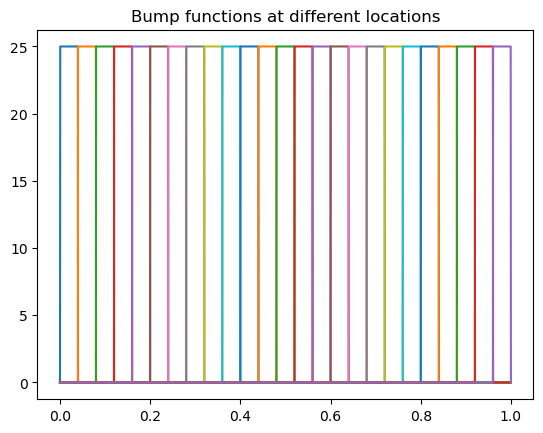

In [14]:
bump_values = vmap_indicator(x, epsilon_values, loc_values)

for i, loc in enumerate(loc_values):
    plt.plot(x, bump_values[:, 0, i])
plt.title("Bump functions at different locations")
plt.show()

In [18]:
def build_max_min_ordering(X, initial_points):
    dist_matrix = squareform(pdist(X))

    # We include a set of initial points (can be boundary points, chosen at random or whatever). These should be indices of the points in X
    idx_order = initial_points

    idx_left = jnp.arange(X.shape[0]).tolist()
    # Remove the initial points from the list of points to order
    idx_left = [x for x in idx_left if x not in idx_order]


    # Compute the current max min distance 
    dist_temp = dist_matrix[idx_order, :]
    score_list = [ jnp.max(jnp.min(dist_temp, axis = 0), axis = -1).item()]

    for i in range(len(idx_left)):
        best_score = jnp.inf
        best_idx = 0
        for j in range(len(idx_left)):
            current_idx = idx_left[j]
            temp_idx =idx_order.copy()
            temp_idx.append(current_idx)
            dist_temp = dist_matrix[temp_idx, :]

            
            current_score = jnp.max(jnp.min(dist_temp, axis = 0), axis = -1)
            if current_score < best_score:
                best_score = current_score
                best_j = j

        # Add the current score to the list
        score_list.append(best_score.item())
        # Add the selected point to the ordering
        idx_order.append(idx_left[best_j])
        # Remove the selected point from the distance matrix
        idx_left.remove(idx_left[best_j])
    return idx_order, score_list

In [58]:
def build_max_min_ordering(X, initial_points):
    print(X)
    dist_matrix = squareform(pdist(X))

    # We include a set of initial points (can be boundary points, chosen at random or whatever). These should be indices of the points in X
    idx_order = initial_points
    #idx_left = jnp.setdiff1d(jnp.arange(X.shape[0]), jnp.array(idx_order)).tolist()



    for i in range(X.shape[0] - len(initial_points)):
        # Compute the current max min distance
        dist_temp = dist_matrix[idx_order, :]
        dist_temp = jnp.min(dist_temp, axis = 0)
        #print(dist_temp)
        # Find the point that maximizes the min distance
        best_j = jnp.argmax(dist_temp).item()
        idx_order.append(best_j)

        

    return jnp.array(idx_order)

In [68]:
from jax import random
def build_max_min_ordering(X, initial_points):
    dist_matrix = squareform(pdist(X))

    # We include a set of initial points (can be boundary points, chosen at random or whatever). These should be indices of the points in X
    idx_order = initial_points
    #idx_left = jnp.setdiff1d(jnp.arange(X.shape[0]), jnp.array(idx_order)).tolist()
    key = random.PRNGKey(23)



    for i in range(X.shape[0] - len(initial_points)):
        print(idx_order)
        key, subkey = random.split(key)
        # Compute the current max min distance
        dist_temp = dist_matrix[idx_order, :]
        dist_temp = jnp.min(dist_temp, axis = 0)
        #print(dist_temp)

        # Find all the points that maximizes the min distance
        max_values = dist_temp.max()
        max_indices = jnp.where(dist_temp == max_values)[0]
        # Select one at random
        best_j = random.choice(subkey, max_indices).item()
        idx_order.append(best_j)

        

    return jnp.array(idx_order)

In [69]:

loc_values_boundary = jnp.hstack([jnp.array([lower, upper]), loc_values])


# Our initial points will be the boundary points
max_min_order = build_max_min_ordering(loc_values_boundary[:, None],[0,1])
max_min_order = max_min_order[2:] -2
print(max_min_order)


[0, 1]
[0, 1, 14]
[0, 1, 14, 20]
[0, 1, 14, 20, 8]
[0, 1, 14, 20, 8, 5]
[0, 1, 14, 20, 8, 5, 11]
[0, 1, 14, 20, 8, 5, 11, 17]
[0, 1, 14, 20, 8, 5, 11, 17, 23]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19, 24]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19, 24, 16]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19, 24, 16, 10]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19, 24, 16, 10, 6]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19, 24, 16, 10, 6, 7]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19, 24, 16, 10, 6, 7, 4]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19, 24, 16, 10, 6, 7, 4, 13]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19, 24, 16, 10, 6, 7, 4, 13, 12]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19, 24, 16, 10, 6, 7, 4, 13, 12, 9]
[0, 1, 14, 20, 8, 5, 11, 17, 23, 3, 25, 21, 19, 24, 16, 10, 6, 7, 4, 13, 12, 

In [70]:
max_min_order

Array([12, 18,  6,  3,  9, 15, 21,  1, 23, 19, 17, 22, 14,  8,  4,  5,  2,
       11, 10,  7, 16, 13, 20, 24,  0], dtype=int64)

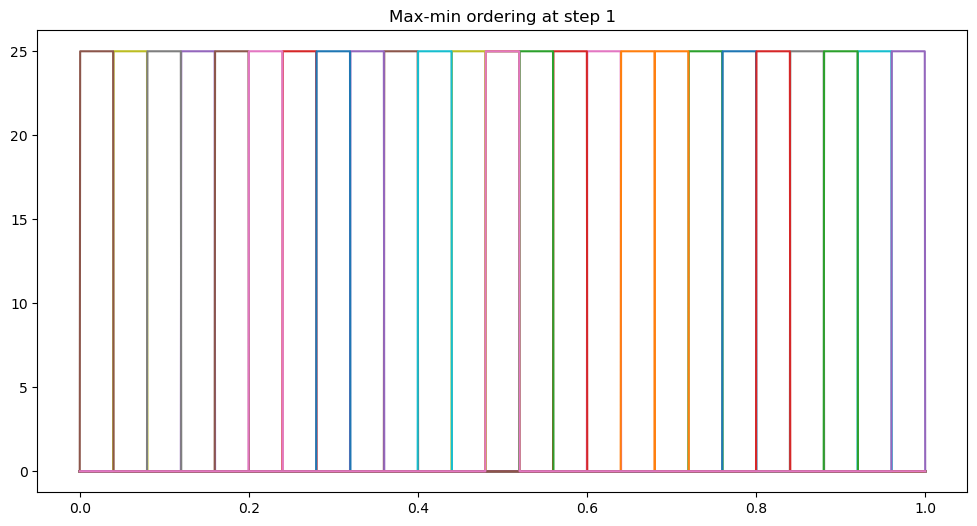

In [71]:

# Plot an animation of the ordering
from matplotlib.animation import FuncAnimation

def update(i):

    ax.plot(x, bump_values[:, 0, max_min_order[i]])

    ax.set_title(f"Max-min ordering at step {i+1}")


# Initialize the plot
fig, ax = plt.subplots(figsize = (12,6))

animation = FuncAnimation(fig, update, frames=len(max_min_order), interval=500, repeat=False)
HTML(animation.to_jshtml())

In [21]:
len(max_min_order), loc_values.shape

(25, (25,))

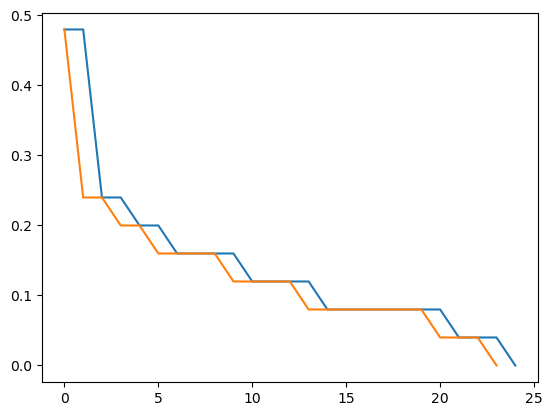

In [22]:
dist_matrix = squareform(pdist(loc_values_boundary[:, None]))
score_2 = []
for i in range(len(max_min_order)):
    dist_temp = dist_matrix[max_min_order[:i+1], :]
    score_2.append(jnp.max(jnp.min(dist_temp, axis = 0), axis = -1).item())
plt.plot(score)
plt.plot(score_2[1:])

In [7]:
# print(max_min_order)
# # # Remove the boundary points from the list of points
# max_min_order = jnp.array(max_min_order[2:]) -2
# print(max_min_order)

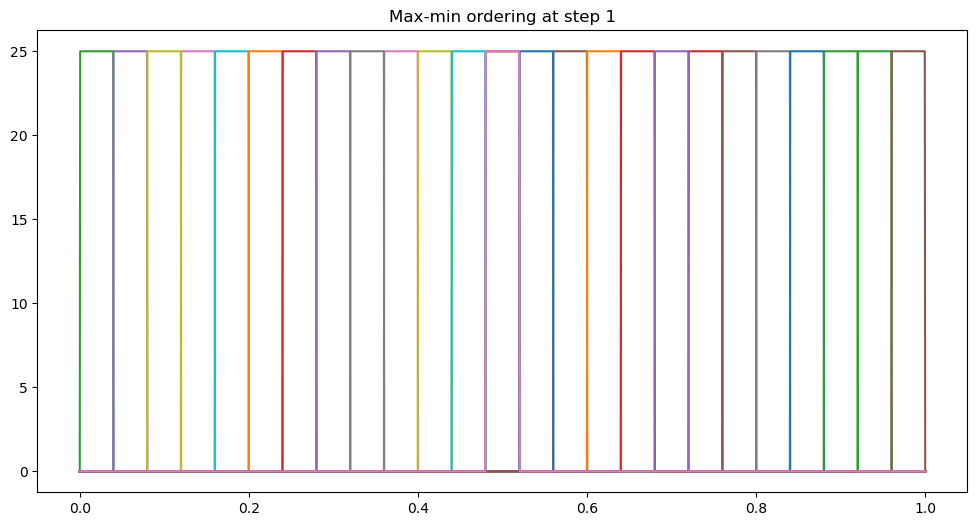

In [57]:
len(max_min_order)

5

In [10]:
len(max_min_order)

22

In [42]:
max_min_order

[0, 1, 11, 13, 3, 0, 1, 2, 4, 15, 6, 17, 5, 7, 8, 19, 9, 10, 12, 14, 16, 18]

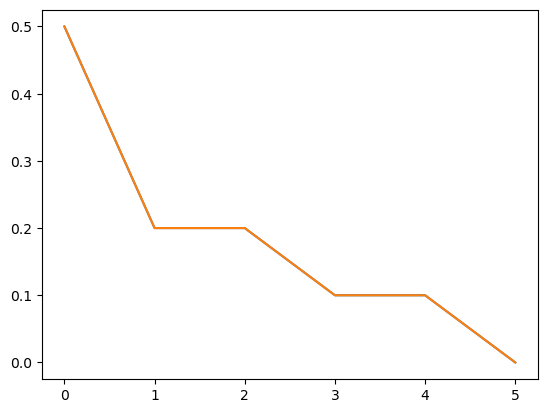

In [36]:
plt.plot(score)
plt.plot(score_2[1:])

In [37]:
score, score_2

([0.4750000000000001,
  0.24999999999999994,
  0.22499999999999998,
  0.19999999999999996,
  0.19999999999999996,
  0.19999999999999996,
  0.19999999999999996,
  0.19999999999999996,
  0.14999999999999997,
  0.1499999999999999,
  0.09999999999999998,
  0.09999999999999998,
  0.09999999999999998,
  0.09999999999999998,
  0.04999999999999999,
  0.04999999999999999,
  0.04999999999999999,
  0.04999999999999993,
  0.04999999999999993,
  0.04999999999999993,
  0.04999999999999993],
 [1.0,
  0.4750000000000001,
  0.09999999999999998,
  0.09999999999999998,
  0.22499999999999998,
  1.0,
  0.4750000000000001,
  0.24999999999999994,
  0.19999999999999996,
  0.04999999999999999,
  0.19999999999999996,
  0.04999999999999999,
  0.19999999999999996,
  0.19999999999999996,
  0.19999999999999996,
  0.04999999999999993,
  0.14999999999999997,
  0.1499999999999999,
  0.09999999999999998,
  0.09999999999999998,
  0.04999999999999999,
  0.04999999999999993])

In [29]:
X = jnp.linspace(0,1, 100)[:, None]
dist_matrix = squareform(pdist(X))

# We always include boundary points at the beginning of the ordering
idx_order = [0, X.shape[0]-1]
# We start with all points not in the ordering
idx_left = jnp.arange(1, X.shape[0]-1)


dist_temp = dist_matrix[idx_order, :]
print(dist_temp.shape)
print(jnp.max(jnp.min(dist_temp, axis = 0), axis = -1).shape)
score_list = [ jnp.max(jnp.min(dist_temp, axis = 0), axis = -1)]

# for i in range(X.shape[0]-2):
#     best_score = jnp.inf
#     best_idx = 0
#     for j in range(len(idx_left)):
#         current_idx = idx_left[j].item()
#         temp_idx =idx_order.copy()
#         temp_idx.append(current_idx)
#         dist_temp = dist_matrix[temp_idx, :]
        
#         current_score = jnp.max(jnp.min(dist_temp, axis = 0), axis = -1)
#         if current_score < best_score:
#             best_score = current_score
#             best_j = j
#     # Add the current score to the list
#     score_list.append(best_score)
#     # Add the selected point to the ordering
#     idx_order.append(idx_left[best_j].item())
#     # Remove the selected point from the distance matrix
#     idx_left = jnp.delete(idx_left, best_j)



        












(2, 100)
()


In [28]:
idx_order

[0,
 99,
 49,
 50,
 1,
 2,
 53,
 4,
 54,
 5,
 3,
 6,
 56,
 8,
 59,
 10,
 60,
 7,
 9,
 11,
 12,
 63,
 14,
 64,
 13,
 15,
 16,
 67,
 18,
 68,
 19,
 17,
 20,
 70,
 22,
 73,
 24,
 74,
 21,
 23,
 25,
 26,
 77,
 28,
 78,
 27,
 29,
 30,
 80,
 31,
 81,
 32,
 82,
 33,
 34,
 84,
 35,
 85,
 36,
 87,
 38,
 88,
 37,
 39,
 40,
 91,
 42,
 92,
 43,
 41,
 44,
 94,
 46,
 96,
 45,
 47,
 48,
 51,
 52,
 55,
 57,
 58,
 61,
 62,
 65,
 66,
 69,
 71,
 72,
 75,
 76,
 79,
 83,
 86,
 89,
 97,
 90,
 93,
 95,
 98]

In [80]:
import matplotlib.pyplot as plt

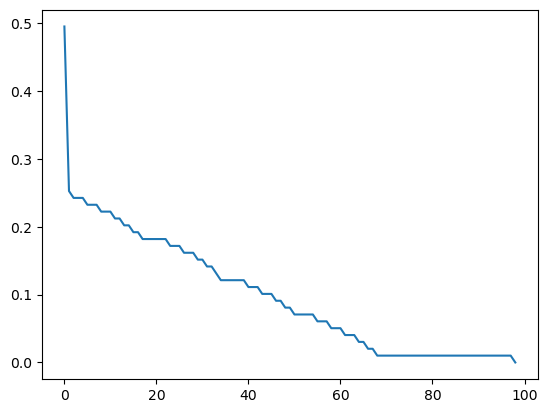

In [81]:
plt.plot(score_list)

In [19]:
idx_left

Array([0, 1, 2, 3, 5, 6, 7, 8, 9], dtype=int32)